In [ ]:
pip install yfinance nltk requests

In [ ]:
import yfinance as yf
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER for sentiment analysis
nltk.download('vader_lexicon')

# Function to fetch stock data
def fetch_stock_data(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period='5d')  # Fetch the last 5 days of data
    return data

# Function to fetch news headlines (placeholder function)
def fetch_news_headlines(ticker):
    # In practice, you would replace this with actual news fetching logic
    # For now, we are using static headlines for demonstration
    return [
        f"{ticker} stock rallies after earnings report.",
        f"Analysts predict a downturn for {ticker} in the coming months.",
        f"{ticker} faces legal challenges over patent issues.",
        f"Market response to {ticker}'s latest product launch is overwhelmingly positive."
    ]

# Function to perform sentiment analysis
def analyze_sentiment(headlines):
    sia = SentimentIntensityAnalyzer()
    sentiments = []
    for headline in headlines:
        sentiment = sia.polarity_scores(headline)
        sentiments.append((headline, sentiment))
    return sentiments

# Main function
def main(ticker):
    # Fetch stock data
    stock_data = fetch_stock_data(ticker)
    print("Stock Data:")
    print(stock_data)

    # Fetch news headlines
    headlines = fetch_news_headlines(ticker)

    # Perform sentiment analysis
    sentiment_results = analyze_sentiment(headlines)

    print("\nSentiment Analysis Results:")
    for headline, sentiment in sentiment_results:
        print(f"Headline: {headline}, Sentiment: {sentiment}")

# Example usage
if __name__ == "__main__":
    main("AAPL")  # Replace 'AAPL' with your desired stock ticker


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Stock Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-10-11 00:00:00-04:00  229.300003  229.410004  227.339996  227.550003   
2024-10-14 00:00:00-04:00  228.699997  231.729996  228.600006  231.300003   
2024-10-15 00:00:00-04:00  233.610001  237.490005  232.369995  233.850006   
2024-10-16 00:00:00-04:00  231.600006  232.119995  229.839996  231.779999   
2024-10-17 00:00:00-04:00  233.429993  233.850006  230.520004  232.149994   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-10-11 00:00:00-04:00  31759200        0.0           0.0  
2024-10-14 00:00:00-04:00  39882100        0.0           0.0  
2024-10-15 00:00:00-04:00  64751400        0.0           0.0  
2024-10-16 00:00:00-04:00  34082200        0.0           0.0  
2024-10-17 00:00:00-04:00  32978900        0.0           0.0  

Sentim

In [ ]:
pip install beautifulsoup4

In [ ]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER for sentiment analysis
nltk.download('vader_lexicon')

# Function to fetch stock data
def fetch_stock_data(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period='5d')  # Fetch the last 5 days of data
    return data

# Function to fetch news articles from Yahoo Finance
def fetch_news_articles(ticker):
    url = f"https://finance.yahoo.com/quote/{ticker}/news?p={ticker}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = []

    for item in soup.find_all('li', class_='js-stream-content'):
        headline = item.find('h3').text
        link = item.find('a')['href']
        if not link.startswith('http'):
            link = 'https://finance.yahoo.com' + link
        articles.append((headline, link))

    return articles

# Function to fetch the content of each article
def fetch_article_content(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        content = ' '.join([para.text for para in paragraphs])
        return content
    except Exception as e:
        print(f"Error fetching article content: {e}")
        return ""

# Function to perform sentiment analysis
def analyze_sentiment(article_contents):
    sia = SentimentIntensityAnalyzer()
    sentiments = []
    for content in article_contents:
        sentiment = sia.polarity_scores(content)
        sentiments.append(sentiment)
    return sentiments

# Main function
def main(ticker):
    # Fetch stock data
    stock_data = fetch_stock_data(ticker)
    print("Stock Data:")
    print(stock_data)

    # Fetch news articles
    articles = fetch_news_articles(ticker)

    # Fetch the content of each article
    article_contents = []
    for _, link in articles:
        content = fetch_article_content(link)
        if content:  # Only add non-empty contents
            article_contents.append(content)

    # Perform sentiment analysis
    sentiment_results = analyze_sentiment(article_contents)

    print("\nSentiment Analysis Results:")
    for (headline, _), sentiment in zip(articles, sentiment_results):
        print(f"Headline: {headline}\nSentiment: {sentiment}\n")

# Example usage
if __name__ == "__main__":
    main("AAPL")  # Replace 'AAPL' with your desired stock ticker


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Stock Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-10-11 00:00:00-04:00  229.300003  229.410004  227.339996  227.550003   
2024-10-14 00:00:00-04:00  228.699997  231.729996  228.600006  231.300003   
2024-10-15 00:00:00-04:00  233.610001  237.490005  232.369995  233.850006   
2024-10-16 00:00:00-04:00  231.600006  232.119995  229.839996  231.779999   
2024-10-17 00:00:00-04:00  233.429993  233.850006  230.520004  232.149994   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-10-11 00:00:00-04:00  31759200        0.0           0.0  
2024-10-14 00:00:00-04:00  39882100        0.0           0.0  
2024-10-15 00:00:00-04:00  64751400        0.0           0.0  
2024-10-16 00:00:00-04:00  34082200        0.0           0.0  
2024-10-17 00:00:00-04:00  32978900        0.0           0.0  

Sentim

In [ ]:
94a44c5e22284be1aebbe334af0ac941

In [ ]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Apple&'
       'from=2024-10-18&'
       'sortBy=popularity&'
       'apiKey=94a44c5e22284be1aebbe334af0ac941')

import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Apple&'
       'from=2024-10-18&'
       'sortBy=popularity&'
       'apiKey=94a44c5e22284be1aebbe334af0ac941')

response = requests.get(url)

print(response.json())

{'status': 'ok', 'totalResults': 0, 'articles': []}


In [ ]:
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER for sentiment analysis
nltk.download('vader_lexicon')

# Your News API key
API_KEY = '94a44c5e22284be1aebbe334af0ac941'  # Replace with your actual News API key

# Function to fetch news articles from News API
def fetch_news_articles(ticker):
    url = f'https://newsapi.org/v2/everything?q={ticker}&apiKey={API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return articles
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Function to perform sentiment analysis
def analyze_sentiment(articles):
    sia = SentimentIntensityAnalyzer()
    sentiments = []
    for article in articles:
        title = article.get('title', '')
        description = article.get('description', '')

        # Ensure both title and description are strings
        content = (title if title else '') + ' ' + (description if description else '')
        sentiment = sia.polarity_scores(content)
        sentiments.append((title, sentiment))
    return sentiments

# Main function
def main(ticker):
    # Fetch news articles
    articles = fetch_news_articles(ticker)

    if not articles:
        print("No articles found.")
        return

    # Perform sentiment analysis
    sentiment_results = analyze_sentiment(articles)

    print("\nSentiment Analysis Results:")
    for title, sentiment in sentiment_results:
        print(f"Title: {title}\nSentiment: {sentiment}\n")

# Example usage
if __name__ == "__main__":
    main("AAPL")  # Replace 'AAPL' with your desired stock ticker


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Analysis Results:
Title: The iPhone 16 is on shelves, but what is consumer demand indicating?
Sentiment: {'neg': 0.046, 'neu': 0.954, 'pos': 0.0, 'compound': -0.1901}

Title: Tim Cook sells $50M worth of AAPL shares, but the timing is coincidental
Sentiment: {'neg': 0.052, 'neu': 0.749, 'pos': 0.199, 'compound': 0.8126}

Title: AAPL earnings call on October 31 will include early iPhone 16 sales
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Title: Apple has finally dropped iOS 18. Here's what's changed
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Title: Apple is losing out to Huawei in China. Here's why
Sentiment: {'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'compound': -0.3818}

Title: Apple iPhone 16 demand is so weak employees can already buy it on discount
Sentiment: {'neg': 0.144, 'neu': 0.675, 'pos': 0.182, 'compound': 0.4357}

Title: Amazon Prime Video will soon have Apple TV+ because streaming is just cable now
Sentiment: {'neg': 0

In [ ]:
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER for sentiment analysis
nltk.download('vader_lexicon')

# Your News API key
API_KEY = '94a44c5e22284be1aebbe334af0ac941'  # Replace with your actual News API key

# Function to fetch news articles from News API
def fetch_news_articles(stock_name):
    url = f'https://newsapi.org/v2/everything?q={stock_name}&apiKey={API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return articles
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Function to perform sentiment analysis
def analyze_sentiment(articles):
    sia = SentimentIntensityAnalyzer()
    sentiments = []
    for article in articles:
        title = article.get('title', '')
        description = article.get('description', '')

        # Ensure both title and description are strings
        content = (title if title else '') + ' ' + (description if description else '')
        sentiment = sia.polarity_scores(content)
        sentiments.append((title, sentiment))
    return sentiments

# Main function
def main():
    stock_name = input("Enter the stock name (e.g., 'AAPL' for Apple): ").strip()

    # Fetch news articles
    articles = fetch_news_articles(stock_name)

    if not articles:
        print("No articles found.")
        return

    # Perform sentiment analysis
    sentiment_results = analyze_sentiment(articles)

    print("\nSentiment Analysis Results:")
    for title, sentiment in sentiment_results:
        print(f"Title: {title}\nSentiment: {sentiment}\n")

# Example usage
if __name__ == "__main__":
    main()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter the stock name (e.g., 'AAPL' for Apple): Tata motors

Sentiment Analysis Results:
Title: Ratan Tata, former chairman of Indian conglomerate Tata Sons, dies at age 86 in a Mumbai hospital
Sentiment: {'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.7351}

Title: Indian entrepreneur, industrialist, and philanthropist, Ratan Tata, dead at 86
Sentiment: {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.7845}

Title: India’s Ratan Tata, the man who knew how to ‘think big and bold’
Sentiment: {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.25}

Title: Ratan Tata, ‘titan’ of Indian business, dies at 86
Sentiment: {'neg': 0.124, 'neu': 0.81, 'pos': 0.067, 'compound': -0.296}

Title: Ratan Tata: India’s Icon Of Business And Branding Genius Dies At 86
Sentiment: {'neg': 0.127, 'neu': 0.809, 'pos': 0.064, 'compound': -0.3818}

Title: Ratan Tata—Ex-Leader Of India’s Massive Tata Group—Dies At 86
Sentiment: {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.8316}

Titl

In [ ]:
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER for sentiment analysis
nltk.download('vader_lexicon')

# Your News API key
API_KEY = '94a44c5e22284be1aebbe334af0ac941'  # Replace with your actual News API key

# Function to fetch news articles based on company name
def fetch_news_articles(company_name):
    url = f'https://newsapi.org/v2/everything?q={company_name}&apiKey={API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return articles
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Function to perform sentiment analysis
def analyze_sentiment(articles):
    sia = SentimentIntensityAnalyzer()
    sentiments = []

    for article in articles:
        title = article.get('title', '')
        description = article.get('description', '')
        content = (title + ' ' + description).strip()

        # Calculate sentiment scores
        sentiment = sia.polarity_scores(content)
        sentiments.append(sentiment)

    return sentiments

# Function to calculate average sentiment scores
def calculate_average_sentiment(sentiments):
    if not sentiments:
        return None

    avg_sentiment = {
        'neg': 0,
        'neu': 0,
        'pos': 0,
        'compound': 0
    }

    for sentiment in sentiments:
        avg_sentiment['neg'] += sentiment['neg']
        avg_sentiment['neu'] += sentiment['neu']
        avg_sentiment['pos'] += sentiment['pos']
        avg_sentiment['compound'] += sentiment['compound']

    num_sentiments = len(sentiments)
    avg_sentiment = {k: v / num_sentiments for k, v in avg_sentiment.items()}

    return avg_sentiment

# Main function
def main():
    company_name = input("Enter the company name (e.g., 'Apple', 'Google'): ").strip()

    # Fetch news articles
    articles = fetch_news_articles(company_name)

    if not articles:
        print("No articles found.")
        return

    # Perform sentiment analysis
    sentiment_results = analyze_sentiment(articles)

    print("\nSentiment Analysis Results:")
    for article in articles:
        title = article.get('title', '')
        print(f"Title: {title}\n")

    # Calculate average sentiment scores
    avg_sentiment = calculate_average_sentiment(sentiment_results)

    if avg_sentiment:
        print("\nAverage Sentiment Scores:")
        print(f"Negative: {avg_sentiment['neg']:.4f}")
        print(f"Neutral: {avg_sentiment['neu']:.4f}")
        print(f"Positive: {avg_sentiment['pos']:.4f}")
        print(f"Compound: {avg_sentiment['compound']:.4f}")

# Example usage
if __name__ == "__main__":
    main()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter the company name (e.g., 'Apple', 'Google'): Tata motors

Sentiment Analysis Results:
Title: Ratan Tata, former chairman of Indian conglomerate Tata Sons, dies at age 86 in a Mumbai hospital

Title: Indian entrepreneur, industrialist, and philanthropist, Ratan Tata, dead at 86

Title: India’s Ratan Tata, the man who knew how to ‘think big and bold’

Title: Ratan Tata, ‘titan’ of Indian business, dies at 86

Title: Ratan Tata: India’s Icon Of Business And Branding Genius Dies At 86

Title: Ratan Tata—Ex-Leader Of India’s Massive Tata Group—Dies At 86

Title: Tata motors chairman Ratan Tata dies aged 86

Title: È morto Ratan Tata: capo del gruppo che controlla Jaguar Land Rover

Title: Ratan Tata passes away at 86

Title: Starbucks, Tetley, Jaguar Land Rover: Remembering Ratan Tata's global ambitions

Title: Muere Ratan Tata, el visionario que encabezó la apertura de la economía india al mundo

Title: Omul de afaceri indian Ratan Tata, creatorul celei mai ieftine mașini din lume, a 

In [ ]:
pip install TextBlob

Enter the company name: Tata motors
Enter the start date (YYYY-MM-DD): 2024-09-20
Enter the end date (YYYY-MM-DD): 2024-10-10


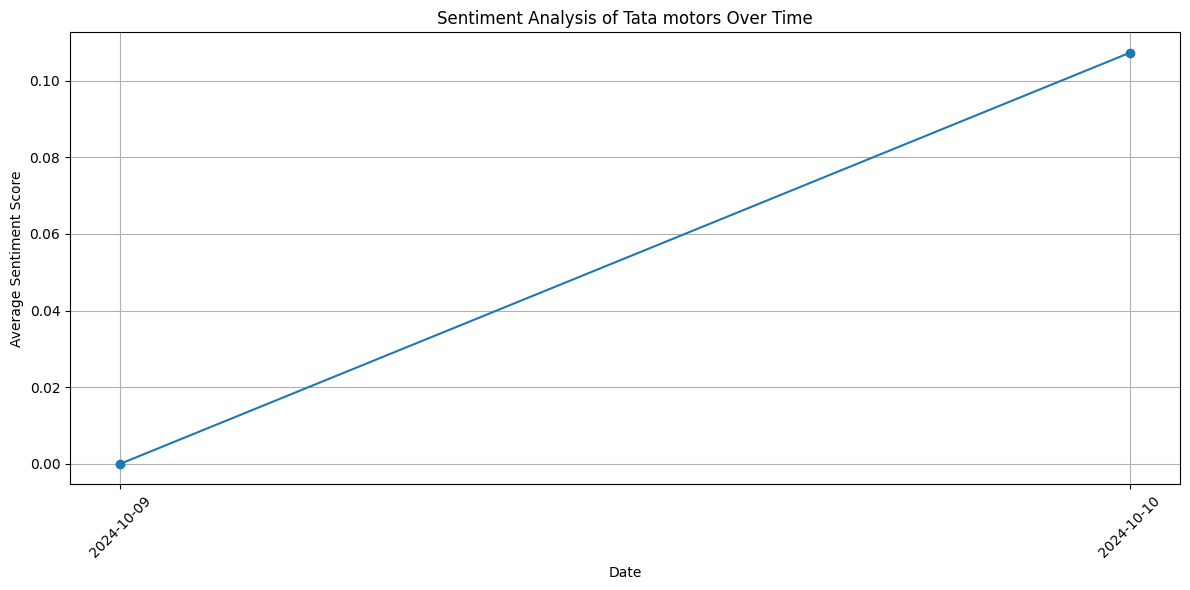

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

# Function to fetch news articles using NewsAPI
def fetch_news(company_name, from_date, to_date):
    api_key = '94a44c5e22284be1aebbe334af0ac941'  # Replace with your NewsAPI key
    url = f'https://newsapi.org/v2/everything?q={company_name}&from={from_date}&to={to_date}&sortBy=publishedAt&apiKey={api_key}'
    response = requests.get(url)
    return response.json()

def analyze_sentiment(articles):
    sentiments = []
    for article in articles:
        # Use get method with default value to handle missing fields
        title = article.get('title', '')
        description = article.get('description', '')

        # Concatenate title and description, ensuring both are strings
        text = (title if title else '') + " " + (description if description else '')
        blob = TextBlob(text)
        sentiments.append(blob.sentiment.polarity)
    return sentiments

# Function to aggregate sentiments by date
def aggregate_sentiment(articles, sentiments):
    data = []
    for article, sentiment in zip(articles, sentiments):
        date = article['publishedAt'][:10]  # Extract date
        data.append({'date': date, 'sentiment': sentiment})

    df = pd.DataFrame(data)
    aggregated = df.groupby('date').mean().reset_index()
    return aggregated

# Function to plot sentiment over time
def plot_sentiment(df, company_name):
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['sentiment'], marker='o')
    plt.title(f'Sentiment Analysis of {company_name} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Main function
def main():
    company_name = input("Enter the company name: ").strip()
    from_date = input("Enter the start date (YYYY-MM-DD): ").strip()
    to_date = input("Enter the end date (YYYY-MM-DD): ").strip()

    # Fetch news articles
    news_data = fetch_news(company_name, from_date, to_date)

    if news_data['status'] != 'ok':
        print("Error fetching news data:", news_data['message'])
        return

    articles = news_data['articles']
    if not articles:
        print("No articles found for the given company.")
        return

    # Analyze sentiment
    sentiments = analyze_sentiment(articles)

    # Aggregate sentiment by date
    aggregated_df = aggregate_sentiment(articles, sentiments)

    # Plot sentiment over time
    plot_sentiment(aggregated_df, company_name)

if __name__ == "__main__":
    main()


In [ ]:
import requests
from textblob import TextBlob
import time

API_KEY = '94a44c5e22284be1aebbe334af0ac941'
BASE_URL = 'https://newsapi.org/v2/everything'

def fetch_financial_news():
    params = {
        'q': 'finance',
        'apiKey': API_KEY,
        'language': 'en',
        'sortBy': 'relevancy',
        'pageSize': 10  # Fetches the top 10 articles
    }
    response = requests.get(BASE_URL, params=params)
    news_data = response.json()
    if news_data['status'] == 'ok':
        headlines = [article['title'] for article in news_data['articles']]
        return headlines
    else:
        print("Error fetching news:", news_data['message'])
        return []

def analyze_sentiment(headlines):
    for headline in headlines:
        analysis = TextBlob(headline)
        print(f"Headline: {headline}")
        print(f"Sentiment: {analysis.sentiment.polarity}")  # Ranges from -1 to 1
        print()

def main():
    while True:
        print("Fetching financial news...")
        headlines = fetch_financial_news()
        if headlines:
            analyze_sentiment(headlines)
        print("Waiting for the next update...")
        time.sleep(60)  # Wait for 10 minutes before fetching news again

if __name__ == "__main__":
    main()


Fetching financial news...
Headline: Trump’s crypto website crashed after its token went on sale
Sentiment: 0.0

Headline: Trumpcoin Launches With a Whimper
Sentiment: 0.0

Headline: Bankers 'neither villains nor rock stars', says Industry creator
Sentiment: 0.0

Headline: Making Friends With Cleo, the AI Budgeting App video
Sentiment: 0.0

Headline: Is AI the Answer to Your Money Problems? Here's What It Can (and Can't) Do
Sentiment: 0.0

Headline: FBI Created a Crypto Token to Bait Pump-and-Dump Scammers
Sentiment: 0.0

Headline: Apollo just set a goal to manage $1.2 trillion in private loans by 2029. These 7 slides show how it will get there.
Sentiment: 0.0

Headline: I broke into venture capital at 22 and became a partner by 28. I learned one easy, surefire way to move up the ranks.
Sentiment: 0.43333333333333335

Headline: 3 money mistakes even accounting professionals make, according to a personal finance expert who worked at EY and PwC
Sentiment: 0.0

Headline: Russia confirms i

KeyboardInterrupt: 

import requests
from textblob import TextBlob
import time

API_KEY = '94a44c5e22284be1aebbe334af0ac941'
BASE_URL = 'https://newsapi.org/v2/everything'

def fetch_financial_news():
    params = {
        'q': 'finance',
        'apiKey': API_KEY,
        'language': 'en',
        'sortBy': 'relevancy',
        'pageSize': 5  # Fetches the top 5 articles
    }
    response = requests.get(BASE_URL, params=params)
    news_data = response.json()
    
    if news_data['status'] == 'ok':
        articles = [(article['title'], article['content']) for article in news_data['articles'] if article['content']]
        return articles
    else:
        print("Error fetching news:", news_data['message'])
        return []

def analyze_sentiment(articles):
    for title, content in articles:
        analysis = TextBlob(content)
        print(f"Title: {title}")
        print(f"Sentiment: {analysis.sentiment.polarity}")  # Ranges from -1 (negative) to 1 (positive)
        print(f"Content: {content}\n")

def main():
    while True:
        print("Fetching financial news...")
        articles = fetch_financial_news()
        if articles:
            analyze_sentiment(articles)
        print("Waiting for the next update...")
        time.sleep(60)  # Wait for 10 minutes before fetching news again

if __name__ == "__main__":
    main()


In [ ]:
import requests
from textblob import TextBlob
import time

API_KEY = '94a44c5e22284be1aebbe334af0ac941'
BASE_URL = 'https://newsapi.org/v2/everything'

def fetch_company_news(company_name):
    params = {
        'q': company_name,
        'apiKey': API_KEY,
        'language': 'en',
        'sortBy': 'relevancy',
        'pageSize': 5  # Fetches the top 5 articles
    }
    response = requests.get(BASE_URL, params=params)
    news_data = response.json()

    if news_data['status'] == 'ok':
        articles = [(article['title'], article['content']) for article in news_data['articles'] if article['content']]
        return articles
    else:
        print("Error fetching news:", news_data['message'])
        return []

def analyze_sentiment(articles):
    for title, content in articles:
        analysis = TextBlob(content)
        print(f"Title: {title}")
        print(f"Sentiment: {analysis.sentiment.polarity}")  # Ranges from -1 (negative) to 1 (positive)
        print(f"Content: {content}\n")

def main():
    company_name = input("Enter the company name you want to analyze: ")

    while True:
        print(f"Fetching news for {company_name}...")
        articles = fetch_company_news(company_name)
        if articles:
            analyze_sentiment(articles)
        else:
            print("No articles found.")

        print("Waiting for the next update...")
        time.sleep(60)  # Wait for 10 minutes before fetching news again

if __name__ == "__main__":
    main()


Enter the company name you want to analyze: RVNL
Fetching news for RVNL...
Title: Stock to Watch: RVNL shares in focus on bagging Rs 270 crore order from Maha Metro
Sentiment: 0.25
Content: (What's moving Sensex and Nifty Track latest market news, stock tips, Budget 2024 and expert advice, on ETMarkets. Also, ETMarkets.com is now on Telegram. For fastest news alerts on financial markets… [+317 chars]

Title: RVNL, Suzlon Energy may get largecap status next year
Sentiment: 0.25
Content: (What's moving Sensex and Nifty Track latest market news, stock tips, Budget 2024 and expert advice, on ETMarkets. Also, ETMarkets.com is now on Telegram. For fastest news alerts on financial markets… [+317 chars]

Title: RVNL, Cochin Shipyard among 67 stocks to trade ex-dividend on Monday; last day to buy today
Sentiment: 0.0
Content: State-owned Rail Vikas Nigam (RVNL) and Cochin Shipyard along with the recently-listed Ceigall India among 67 companies are likely to remain in focus today as these compan

KeyboardInterrupt: 

In [ ]:
import requests
from textblob import TextBlob
from datetime import datetime, timedelta
import time

API_KEY = '94a44c5e22284be1aebbe334af0ac941'
BASE_URL = 'https://newsapi.org/v2/everything'

def fetch_company_news(company_name, from_date, to_date):
    params = {
        'q': company_name,
        'apiKey': API_KEY,
        'language': 'en',
        'sortBy': 'relevancy',
        'from': from_date,
        'to': to_date,
        'pageSize': 100,  # Fetches up to 100 articles
        'country': 'in'
    }
    response = requests.get(BASE_URL, params=params)
    news_data = response.json()

    if news_data['status'] == 'ok':
        articles = [(article['title'], article['content']) for article in news_data['articles'] if article['content']]
        return articles
    else:
        print("Error fetching news:", news_data['message'])
        return []

def analyze_sentiment(articles):
    total_sentiment = 0
    for title, content in articles:
        analysis = TextBlob(content)
        total_sentiment += analysis.sentiment.polarity  # Sum up sentiment polarity
        print(f"Title: {title}")
        print(f"Sentiment: {analysis.sentiment.polarity}")
        print(f"Content: {content}\n")

    # Calculate average sentiment
    if articles:
        average_sentiment = total_sentiment / len(articles)
        print(f"Average Sentiment for articles: {average_sentiment}\n")
    else:
        print("No articles to analyze.")

def main():
    company_name = input("Enter the company name you want to analyze: ")

    # Set the date range for the last 15 days
    to_date = datetime.now()
    from_date = to_date - timedelta(days=15)

    # Format dates as strings
    to_date_str = to_date.strftime('%Y-%m-%d')
    from_date_str = from_date.strftime('%Y-%m-%d')

    print(f"Analyzing news for {company_name} from {from_date_str} to {to_date_str}...\n")

    articles = fetch_company_news(company_name, from_date_str, to_date_str)
    analyze_sentiment(articles)

if __name__ == "__main__":
    main()


Enter the company name you want to analyze: titan
Analyzing news for titan from 2024-10-03 to 2024-10-18...

Error fetching news: The country param is not currently supported on the /everything endpoint.
No articles to analyze.


In [ ]:
import requests
from textblob import TextBlob
from datetime import datetime, timedelta

API_KEY = '94a44c5e22284be1aebbe334af0ac941'

def fetch_news_articles(company_name, from_date, to_date):
    url = f'https://newsapi.org/v2/everything?q={company_name}&from={from_date}&to={to_date}&apiKey={API_KEY}&language=en&sortBy=relevancy'
    response = requests.get(url)

    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return articles
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

def analyze_sentiment(articles):
    total_sentiment = 0
    for article in articles:
        title = article.get('title')
        content = article.get('content')
        if content:
            analysis = TextBlob(content)
            total_sentiment += analysis.sentiment.polarity
            print(f"Title: {title}")
            print(f"Sentiment: {analysis.sentiment.polarity}")
            print(f"Content: {content}\n")

    if articles:
        average_sentiment = total_sentiment / len(articles)
        print(f"Average Sentiment for articles: {average_sentiment}\n")
    else:
        print("No articles to analyze.")

def main():
    company_name = input("Enter the company name you want to analyze: ")

    # Set the date range for the last 15 days
    to_date = datetime.now()
    from_date = to_date - timedelta(days=15)

    # Format dates as strings
    to_date_str = to_date.strftime('%Y-%m-%d')
    from_date_str = from_date.strftime('%Y-%m-%d')

    print(f"Analyzing news for {company_name} from {from_date_str} to {to_date_str}...\n")

    articles = fetch_news_articles(company_name, from_date_str, to_date_str)
    analyze_sentiment(articles)

if __name__ == "__main__":
    main()


Enter the company name you want to analyze: titan
Analyzing news for titan from 2024-10-03 to 2024-10-18...

Title: Indian tycoon Ratan Tata dies aged 86
Sentiment: 0.225
Content: Ratan Tata was one of India's most internationally recognised business leaders
Indian tycoon Ratan Tata has died aged 86, says the Tata Group, the conglomerate he led for more than two decades.
Tat… [+2083 chars]

Title: Destiny’s Next Big Step Is a Whole New Mobile Game
Sentiment: 0.05952380952380952
Content: For over a decade, the Destiny franchise has taken players on adventures throughout the galaxy on console and PC. The sci-fi shooter’s in an odd place right now, but Bungie is committed to expanding … [+1911 chars]

Title: I've worked at Costco for 19 years. Here are 10 of the best things I'm seeing on the shelves right now.
Sentiment: 0.07878787878787878
Content: This month, Costco has a few fun items for kids.Veronica Thatcher
<ul><li>This month, Costco is carrying a new bakery item and some treats fo

In [ ]:
import requests
from textblob import TextBlob
from datetime import datetime, timedelta

API_KEY = '94a44c5e22284be1aebbe334af0ac941'

def fetch_news_articles(company_name, from_date, to_date):
    url = f'https://newsapi.org/v2/everything?q={company_name}&from={from_date}&to={to_date}&apiKey={API_KEY}&language=en&sortBy=relevancy'
    response = requests.get(url)

    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return articles
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

def analyze_sentiment(articles):
    positive_sentiment = 0
    negative_sentiment = 0
    neutral_sentiment = 0
    total_sentiment = 0
    count = 0

    for article in articles:
        title = article.get('title')
        content = article.get('content')
        if content:
            analysis = TextBlob(content)
            polarity = analysis.sentiment.polarity
            total_sentiment += polarity
            count += 1

            if polarity > 0:
                positive_sentiment += 1
            elif polarity < 0:
                negative_sentiment += 1
            else:
                neutral_sentiment += 1

            print(f"Title: {title}")
            print(f"Sentiment Polarity: {polarity}")
            print(f"Content: {content}\n")

    if count > 0:
        average_sentiment = total_sentiment / count
        print(f"Total Articles Analyzed: {count}")
        print(f"Positive Sentiment Count: {positive_sentiment}")
        print(f"Negative Sentiment Count: {negative_sentiment}")
        print(f"Neutral Sentiment Count: {neutral_sentiment}")
        print(f"Average Sentiment Polarity: {average_sentiment}\n")
    else:
        print("No articles to analyze.")

def main():
    company_name = input("Enter the company name you want to analyze: ")

    # Set the date range for the last 15 days
    to_date = datetime.now()
    from_date = to_date - timedelta(days=15)

    # Format dates as strings
    to_date_str = to_date.strftime('%Y-%m-%d')
    from_date_str = from_date.strftime('%Y-%m-%d')

    print(f"Analyzing news for {company_name} from {from_date_str} to {to_date_str}...\n")

    articles = fetch_news_articles(company_name, from_date_str, to_date_str)
    analyze_sentiment(articles)

if __name__ == "__main__":
    main()


Enter the company name you want to analyze: titan
Analyzing news for titan from 2024-10-03 to 2024-10-18...

Title: Indian tycoon Ratan Tata dies aged 86
Sentiment Polarity: 0.225
Content: Ratan Tata was one of India's most internationally recognised business leaders
Indian tycoon Ratan Tata has died aged 86, says the Tata Group, the conglomerate he led for more than two decades.
Tat… [+2083 chars]

Title: Destiny’s Next Big Step Is a Whole New Mobile Game
Sentiment Polarity: 0.05952380952380952
Content: For over a decade, the Destiny franchise has taken players on adventures throughout the galaxy on console and PC. The sci-fi shooter’s in an odd place right now, but Bungie is committed to expanding … [+1911 chars]

Title: I've worked at Costco for 19 years. Here are 10 of the best things I'm seeing on the shelves right now.
Sentiment Polarity: 0.07878787878787878
Content: This month, Costco has a few fun items for kids.Veronica Thatcher
<ul><li>This month, Costco is carrying a new bak

In [ ]:
import requests
from textblob import TextBlob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import time

API_KEY = '94a44c5e22284be1aebbe334af0ac941'

def fetch_news_articles(company_name, from_date, to_date):
    url = f'https://newsapi.org/v2/everything?q={company_name}&from={from_date}&to={to_date}&apiKey={API_KEY}&language=en&sortBy=relevancy'

    for _ in range(3):  # Retry up to 3 times
        response = requests.get(url)

        if response.status_code == 200:
            articles = response.json().get('articles', [])
            return articles
        elif response.status_code == 429:
            print("Rate limit exceeded. Retrying after 60 seconds...")
            time.sleep(60)  # Wait for a minute before retrying
        else:
            print(f"Error fetching news: {response.status_code}")
            return []

    print("Failed to fetch articles after retries.")
    return []

def analyze_sentiment(articles):
    sentiments = []

    for article in articles:
        content = article.get('content')
        if content:
            analysis = TextBlob(content)
            polarity = analysis.sentiment.polarity
            sentiments.append(polarity)

    return sentiments

def main():
    company_name = input("Enter the company name you want to analyze: ")

    # Set the date range for the last 1 year
    to_date = datetime.now()
    from_date = to_date - timedelta(days=365)

    # Prepare to store weekly sentiment data
    weekly_sentiments = []
    date_range = pd.date_range(start=from_date, end=to_date, freq='W')

    for start_date in date_range:
        end_date = start_date + timedelta(days=6)  # End of the week
        start_date_str = start_date.strftime('%Y-%m-%d')
        end_date_str = end_date.strftime('%Y-%m-%d')

        articles = fetch_news_articles(company_name, start_date_str, end_date_str)
        sentiments = analyze_sentiment(articles)

        if sentiments:
            average_sentiment = sum(sentiments) / len(sentiments)
        else:
            average_sentiment = None

        weekly_sentiments.append((start_date, average_sentiment))

    # Create a DataFrame for plotting
    df = pd.DataFrame(weekly_sentiments, columns=['Date', 'Average Sentiment'])
    df.dropna(inplace=True)  # Remove rows with no sentiment data

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Average Sentiment'], marker='o', linestyle='-', color='b')
    plt.title(f'Sentiment Analysis of {company_name} Over the Last Year')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Polarity')
    plt.axhline(0, color='red', linestyle='--')  # Line for neutral sentiment
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Rate limit exceeded. Retrying after 60 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 60 seconds...


KeyboardInterrupt: 

Enter the company name you want to analyze: titan


<ipython-input-36-e6ce68ef4337>:52: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date_range = pd.date_range(start=from_date, end=to_date, freq='Q')


Rate limit exceeded. Retrying after 1 seconds...
Rate limit exceeded. Retrying after 2 seconds...
Rate limit exceeded. Retrying after 4 seconds...
Rate limit exceeded. Retrying after 8 seconds...
Rate limit exceeded. Retrying after 16 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 1 seconds...
Rate limit exceeded. Retrying after 2 seconds...
Rate limit exceeded. Retrying after 4 seconds...
Rate limit exceeded. Retrying after 8 seconds...
Rate limit exceeded. Retrying after 16 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 1 seconds...
Rate limit exceeded. Retrying after 2 seconds...
Rate limit exceeded. Retrying after 4 seconds...
Rate limit exceeded. Retrying after 8 seconds...
Rate limit exceeded. Retrying after 16 seconds...
Failed to fetch articles after retries.
Rate limit exceeded. Retrying after 1 seconds...
Rate limit exceeded. Retrying after 2 seconds...
Rate limit exceeded. Retrying after 4 second

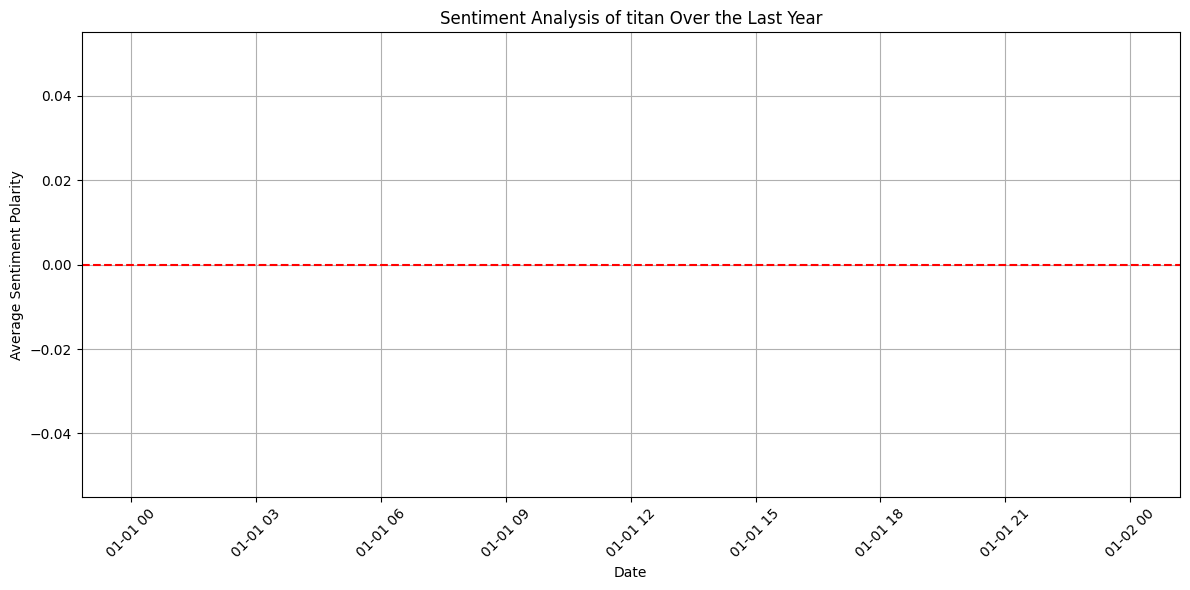

In [ ]:
import requests
from textblob import TextBlob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import time

API_KEY = '94a44c5e22284be1aebbe334af0ac941'

def fetch_news_articles(company_name, from_date, to_date):
    url = f'https://newsapi.org/v2/everything?q={company_name}&from={from_date}&to={to_date}&apiKey={API_KEY}&language=en&sortBy=relevancy'

    delay = 1  # Start with a 1-second delay
    for _ in range(5):  # Retry up to 5 times
        response = requests.get(url)

        if response.status_code == 200:
            articles = response.json().get('articles', [])
            return articles
        elif response.status_code == 429:
            print(f"Rate limit exceeded. Retrying after {delay} seconds...")
            time.sleep(delay)
            delay = min(delay * 2, 60)  # Exponential backoff, cap at 60 seconds
        else:
            print(f"Error fetching news: {response.status_code}")
            return []

    print("Failed to fetch articles after retries.")
    return []

def analyze_sentiment(articles):
    sentiments = []

    for article in articles:
        content = article.get('content')
        if content:
            analysis = TextBlob(content)
            polarity = analysis.sentiment.polarity
            sentiments.append(polarity)

    return sentiments

def main():
    company_name = input("Enter the company name you want to analyze: ")

    # Set the date range for the last 1 year
    to_date = datetime.now()
    from_date = to_date - timedelta(days=365)

    # Prepare to store quarterly sentiment data
    quarterly_sentiments = []
    date_range = pd.date_range(start=from_date, end=to_date, freq='Q')

    for start_date in date_range:
        end_date = start_date + pd.offsets.QuarterEnd(1)  # End of the quarter
        start_date_str = start_date.strftime('%Y-%m-%d')
        end_date_str = end_date.strftime('%Y-%m-%d')

        articles = fetch_news_articles(company_name, start_date_str, end_date_str)
        sentiments = analyze_sentiment(articles)

        if sentiments:
            average_sentiment = sum(sentiments) / len(sentiments)
        else:
            average_sentiment = None

        quarterly_sentiments.append((start_date, average_sentiment))

    # Create a DataFrame for plotting
    df = pd.DataFrame(quarterly_sentiments, columns=['Date', 'Average Sentiment'])
    df.dropna(inplace=True)  # Remove rows with no sentiment data

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Average Sentiment'], marker='o', linestyle='-', color='b')
    plt.title(f'Sentiment Analysis of {company_name} Over the Last Year')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Polarity')
    plt.axhline(0, color='red', linestyle='--')  # Line for neutral sentiment
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Enter the company ticker symbol you want to analyze: AAPL


<ipython-input-37-eac4dab3e0c7>:49: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date_range = pd.date_range(start=from_date, end=to_date, freq='Q')


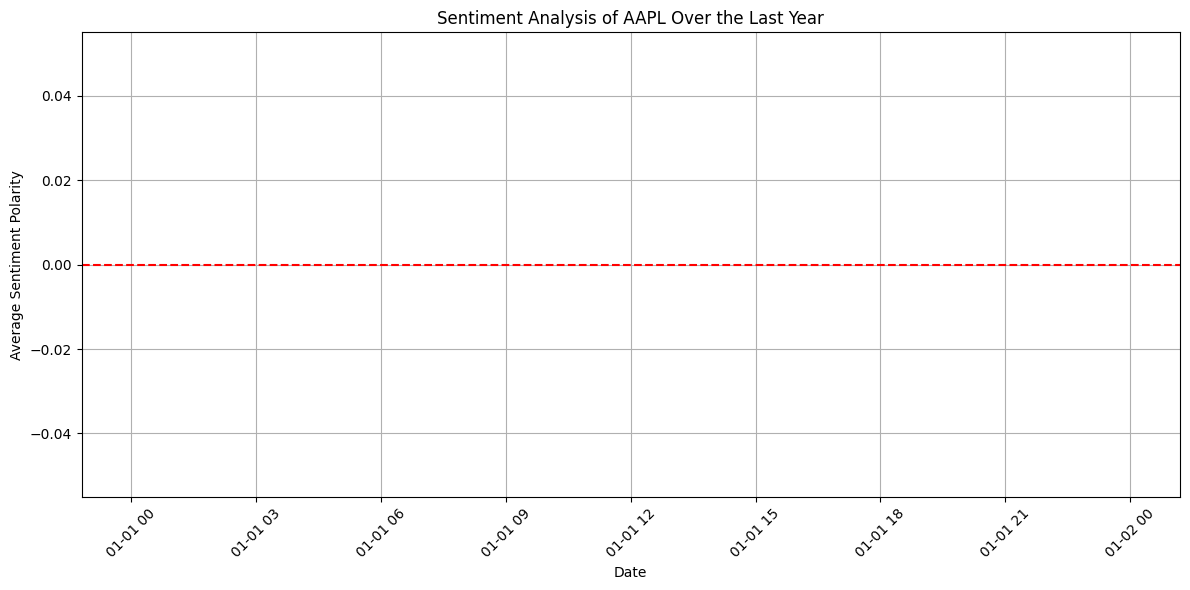

In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import time

def scrape_articles(company_name, from_date, to_date):
    url = f'https://finance.yahoo.com/quote/{company_name}/news?p={company_name}'  # Replace with the target website
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    articles = []
    for item in soup.find_all('li', class_='js-stream-content'):
        title = item.find('h3').text if item.find('h3') else ''
        link = item.find('a')['href'] if item.find('a') else ''
        article_date = item.find('time')['datetime'] if item.find('time') else ''

        # Filter articles by date
        if article_date:
            article_date = datetime.fromisoformat(article_date[:-1])  # Remove 'Z'
            if from_date <= article_date <= to_date:
                articles.append({'title': title, 'link': link, 'date': article_date})

    return articles

def analyze_sentiment(articles):
    sentiments = []

    for article in articles:
        title = article['title']
        if title:
            analysis = TextBlob(title)
            polarity = analysis.sentiment.polarity
            sentiments.append(polarity)

    return sentiments

def main():
    company_name = input("Enter the company ticker symbol you want to analyze: ").upper()

    # Set the date range for the last 1 year
    to_date = datetime.now()
    from_date = to_date - timedelta(days=365)

    # Prepare to store quarterly sentiment data
    quarterly_sentiments = []
    date_range = pd.date_range(start=from_date, end=to_date, freq='Q')

    for start_date in date_range:
        end_date = start_date + pd.offsets.QuarterEnd(1)  # End of the quarter
        start_date_str = start_date.strftime('%Y-%m-%d')
        end_date_str = end_date.strftime('%Y-%m-%d')

        articles = scrape_articles(company_name, start_date_str, end_date_str)
        sentiments = analyze_sentiment(articles)

        if sentiments:
            average_sentiment = sum(sentiments) / len(sentiments)
        else:
            average_sentiment = None

        quarterly_sentiments.append((start_date, average_sentiment))

    # Create a DataFrame for plotting
    df = pd.DataFrame(quarterly_sentiments, columns=['Date', 'Average Sentiment'])
    df.dropna(inplace=True)  # Remove rows with no sentiment data

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Average Sentiment'], marker='o', linestyle='-', color='b')
    plt.title(f'Sentiment Analysis of {company_name} Over the Last Year')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Polarity')
    plt.axhline(0, color='red', linestyle='--')  # Line for neutral sentiment
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
